<a href="https://colab.research.google.com/github/spexdj/Data_Science_II_Machine_Learning/blob/main/Proyecto_ParteIII_%2BLicastro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Paso 1: Resumen del dataset**
Este dataset pertenece a una tienda que vende diversos productos en múltiples categorías. Contiene información sobre clientes, pedidos, envíos y ventas, con variables clave como:

*   Información del cliente: Customer.ID, Customer.Name, Segment
*   Detalles del pedido: Order.ID, Order.Date, Order.Time, Category, Sub.Category
*   Ubicación: City, State, Country, Market
*   Información de ventas y envío: Sales.Total, Discount, Shipping.Cost, Ship.Mode, Ship.Date, Ship_Time
*   Otras métricas: ItemsSale.Count, Year

Los hallazgos clave que se espera  obtener incluyen patrones de compra, impacto de descuentos en las ventas, tiempos de entrega, tendencias en categorías de productos y análisis en el comportamiento del cliente.

# Paso 2: Determinación del Objetivo
El objetivo de este análisis es comprender los factores que influyen en las ventas y la rentabilidad de la tienda. Específicamente, queremos:

1.   Identificar qué categorías y segmentos generan más ingresos.
2.   Evaluar cómo afectan los descuentos a las ventas.
3.   Analizar la eficiencia del proceso de envío y su impacto en la satisfacción del cliente.
4.   Determinar posibles agrupaciones de clientes según sus patrones de compra.

# Paso 3: Contexto Comercial
La tienda "SuperStore Market" es un minorista con operaciones a nivel internacional. Se especializa en la venta de artículos de oficina, tecnología y muebles, y busca mejorar su rentabilidad mediante la optimización de descuentos y procesos logísticos. El análisis de datos ayudará a tomar decisiones estratégicas sobre promociones, inventario y logística.

# Paso 4: Elección de Hipótesis
Dado el tipo de datos y el objetivo del análisis, una hipótesis de regresión es la más adecuada:

Hipótesis: Los descuentos aplicados en las ventas tienen un impacto significativo en los ingresos totales de la tienda.

Este análisis ayudará a entender si los descuentos aumentan las ventas totales o si afectan negativamente la rentabilidad.

# Paso 5: Exploración de Datos (EDA)
## Estructura y Calidad de los Datos
1.   El dataset contiene 51,290 registros y 26 columnas.
2.   No hay valores nulos en ninguna columna.
3.   Existen variables categóricas y numéricas, algunas de las cuales requieren limpieza.
4.   No hay valores duplicados.

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# URL del dataset en GitHub
url = "https://raw.githubusercontent.com/spexdj/Data_Science_II_Machine_Learning/refs/heads/main/superstore3.csv"

In [2]:
# Cargar el dataset desde GitHub con manejo de errores
try:
    df = pd.read_csv(url, encoding='latin1', low_memory=False, on_bad_lines='skip')
    print("Dataset cargado correctamente.")
except Exception as e:
    print("Error al cargar el dataset:", e)
    df = None

Dataset cargado correctamente.


### 🔍 Resumen de la metadata
A continuación se muestra un resumen con la cantidad total de filas y columnas, junto con el tipo de dato de cada una de las columnas del dataset. Esto permite comprender la estructura general de los datos antes de analizarlos.

In [3]:
# Resumen de la metadata
print("Cantidad de filas y columnas:", df.shape)
print("\nTipos de datos por columna:")
print(df.dtypes)

Cantidad de filas y columnas: (51290, 26)

Tipos de datos por columna:
Customer.ID         object
Customer.Name       object
Category            object
City                object
Country             object
Discount            object
Market              object
Order.Date          object
Order.Time          object
Order.ID            object
Order.Priority      object
Product.ID          object
Product.Name        object
Sales.Price        float64
Quantity             int64
Region              object
ItemsSale.Count      int64
Sales.Total         object
Segment             object
Ship.Date           object
Ship_Time           object
Ship.Mode           object
Shipping.Cost      float64
State               object
Sub.Category        object
Year                 int64
dtype: object


In [4]:
print (df)

      Customer.ID     Customer.Name         Category         City  \
0       LS-172304  Lycoris Saunders  Office Supplies  Los Angeles   
1       MV-174854     Mark Van Huff  Office Supplies  Los Angeles   
2       CS-121304      Chad Sievert  Office Supplies  Los Angeles   
3       CS-121304      Chad Sievert  Office Supplies  Los Angeles   
4       AP-109154    Arthur Prichep  Office Supplies  Los Angeles   
...           ...               ...              ...          ...   
51285   AM-103604    Alice McCarthy  Office Supplies  Los Angeles   
51286   AM-103604    Alice McCarthy  Office Supplies  Los Angeles   
51287   HR-147704    Hallie Redmond  Office Supplies  Los Angeles   
51288   RM-196754     Robert Marley  Office Supplies  Los Angeles   
51289   FH-143654      Fred Hopkins  Office Supplies  Los Angeles   

             Country Discount         Market  Order.Date      Order.Time  \
0      United States    0.00%  AMERICA+LATAM  07/01/2011  07:00:00 p. m.   
1      United State

In [5]:
# Mostrar las primeras filas para entender la estructura
print("\nPrimeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
  Customer.ID     Customer.Name         Category         City        Country  \
0   LS-172304  Lycoris Saunders  Office Supplies  Los Angeles  United States   
1   MV-174854     Mark Van Huff  Office Supplies  Los Angeles  United States   
2   CS-121304      Chad Sievert  Office Supplies  Los Angeles  United States   
3   CS-121304      Chad Sievert  Office Supplies  Los Angeles  United States   
4   AP-109154    Arthur Prichep  Office Supplies  Los Angeles  United States   

  Discount         Market  Order.Date      Order.Time        Order.ID  ...  \
0    0.00%  AMERICA+LATAM  07/01/2011  07:00:00 p. m.  CA-2011-130813  ...   
1    0.00%  AMERICA+LATAM  21/01/2011  04:00:00 p. m.  CA-2011-148614  ...   
2    0.00%  AMERICA+LATAM  05/08/2011  07:00:00 a. m.  CA-2011-118962  ...   
3    0.00%  AMERICA+LATAM  05/08/2011  03:00:00 p. m.  CA-2011-118962  ...   
4    0.00%  AMERICA+LATAM  29/09/2011  09:00:00 p. m.  CA-2011-146969  ...   

  ItemsSale.Count Sal

In [6]:
# Exploración de Datos (EDA)
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer.ID      51290 non-null  object 
 1   Customer.Name    51290 non-null  object 
 2   Category         51290 non-null  object 
 3   City             51290 non-null  object 
 4   Country          51290 non-null  object 
 5   Discount         51290 non-null  object 
 6   Market           51290 non-null  object 
 7   Order.Date       51290 non-null  object 
 8   Order.Time       51290 non-null  object 
 9   Order.ID         51290 non-null  object 
 10  Order.Priority   51290 non-null  object 
 11  Product.ID       51290 non-null  object 
 12  Product.Name     51290 non-null  object 
 13  Sales.Price      51290 non-null  float64
 14  Quantity         51290 non-null  int64  
 15  Region           51290 non-null  object 
 16  ItemsSale.Count  51290 n

In [7]:
print("\nDescripción estadística de las variables numéricas:")
print(df.describe())


Descripción estadística de las variables numéricas:
        Sales.Price      Quantity  ItemsSale.Count  Shipping.Cost  \
count  51290.000000  51290.000000     51290.000000   51290.000000   
mean      28.610982      3.476545       246.498440      26.375818   
std      174.340972      2.278766       487.567175      57.296810   
min    -6599.978000      1.000000         0.000000       0.002000   
25%        0.000000      2.000000        31.000000       2.610000   
50%        9.240000      3.000000        85.000000       7.790000   
75%       36.810000      5.000000       251.000000      24.450000   
max     8399.976000     14.000000     22638.000000     933.570000   

               Year  
count  51290.000000  
mean    2012.777208  
std        1.098931  
min     2011.000000  
25%     2012.000000  
50%     2013.000000  
75%     2014.000000  
max     2014.000000  


In [8]:
print("\nValores nulos en el dataset:")
print(df.isnull().sum())


Valores nulos en el dataset:
Customer.ID        0
Customer.Name      0
Category           0
City               0
Country            0
Discount           0
Market             0
Order.Date         0
Order.Time         0
Order.ID           0
Order.Priority     0
Product.ID         0
Product.Name       0
Sales.Price        0
Quantity           0
Region             0
ItemsSale.Count    0
Sales.Total        0
Segment            0
Ship.Date          0
Ship_Time          0
Ship.Mode          0
Shipping.Cost      0
State              0
Sub.Category       0
Year               0
dtype: int64


In [9]:
print("\nCantidad de registros duplicados:", df.duplicated().sum())


Cantidad de registros duplicados: 0


## Identificación de Posibles Problemas
Formato incorrecto en las columnas numéricas:
1.   Discount y Sales.Total son cadenas de texto (probablemente debido a símbolos como % o $).
2.   Order.Date y Ship.Date están en formato de texto en lugar de datetime.

Posibles valores atípicos:
3.   Sales.Price tiene valores negativos y algunos extremadamente altos.
4.   ItemsSale.Count tiene valores inusualmente grandes.

# Paso 6: Preprocesamiento de Datos

##Corrección de Formatos
Discount y Sales.Total ahora están en formato numérico.
Order.Date y Ship.Date fueron convertidas a tipo datetime.

In [10]:
# Convertir columnas numéricas mal formateadas
if 'Discount' in df.columns:
  df["Discount"] = df["Discount"].astype(str).str.replace("%", "").astype(float) / 100
if 'Sales.Total' in df.columns:
  df["Sales.Total"] = df["Sales.Total"].astype(str).str.replace("$", "").str.replace(",", "").astype(float)

print("\nDatos después de convertir variables mal formateadas:")
print(df.head())


Datos después de convertir variables mal formateadas:
  Customer.ID     Customer.Name         Category         City        Country  \
0   LS-172304  Lycoris Saunders  Office Supplies  Los Angeles  United States   
1   MV-174854     Mark Van Huff  Office Supplies  Los Angeles  United States   
2   CS-121304      Chad Sievert  Office Supplies  Los Angeles  United States   
3   CS-121304      Chad Sievert  Office Supplies  Los Angeles  United States   
4   AP-109154    Arthur Prichep  Office Supplies  Los Angeles  United States   

   Discount         Market  Order.Date      Order.Time        Order.ID  ...  \
0       0.0  AMERICA+LATAM  07/01/2011  07:00:00 p. m.  CA-2011-130813  ...   
1       0.0  AMERICA+LATAM  21/01/2011  04:00:00 p. m.  CA-2011-148614  ...   
2       0.0  AMERICA+LATAM  05/08/2011  07:00:00 a. m.  CA-2011-118962  ...   
3       0.0  AMERICA+LATAM  05/08/2011  03:00:00 p. m.  CA-2011-118962  ...   
4       0.0  AMERICA+LATAM  29/09/2011  09:00:00 p. m.  CA-2011-14696

In [11]:
# Convertir fechas a formato datetime
for col in ['Order.Date', 'Ship.Date']:
  if col in df.columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

##Detección de Problemas en los Datos
*   Valores negativos en Sales.Price: 12,544 registros tienen precios negativos, lo cual es un problema.
*   Valores atípicos en ItemsSale.Count: 511 registros tienen valores extremadamente altos.

In [12]:
 # Identificar valores negativos en precios de venta
if 'Sales.Price' in df.columns:
  df = df[df["Sales.Price"] >= 0]

#Paso 7: Análisis Descriptivo
Después de la limpieza, el dataset tiene 34.455 registros.

In [13]:
 # Eliminar valores atípicos en ItemsSale.Count
if 'ItemsSale.Count' in df.columns:
  q1 = df["ItemsSale.Count"].quantile(0.25)
  q3 = df["ItemsSale.Count"].quantile(0.75)
  iqr = q3 - q1
  upper_bound = q3 + 1.5 * iqr
  df = df[df["ItemsSale.Count"] <= upper_bound]

print("\nDatos después de eliminar valores atípicos en ItemsSale.Count:")
print(df.describe())


Datos después de eliminar valores atípicos en ItemsSale.Count:
           Discount                     Order.Date   Sales.Price     Quantity  \
count  34455.000000                          13507  34455.000000  34455.00000   
mean       0.042512  2013-04-03 00:05:00.644110336     30.617384      3.28173   
min        0.000000            2011-01-01 00:00:00      0.000000      1.00000   
25%        0.000000            2012-05-04 00:00:00      5.400000      2.00000   
50%        0.000000            2013-06-04 00:00:00     14.580000      3.00000   
75%        0.000000            2014-04-06 00:00:00     38.040000      4.00000   
max        0.500000            2014-12-12 00:00:00    299.100000     14.00000   
std        0.087954                            NaN     40.960428      2.15677   

       ItemsSale.Count   Sales.Total                      Ship.Date  \
count     34455.000000  34455.000000                          13417   
mean        129.789174    120.686261  2013-04-15 21:35:32.309756

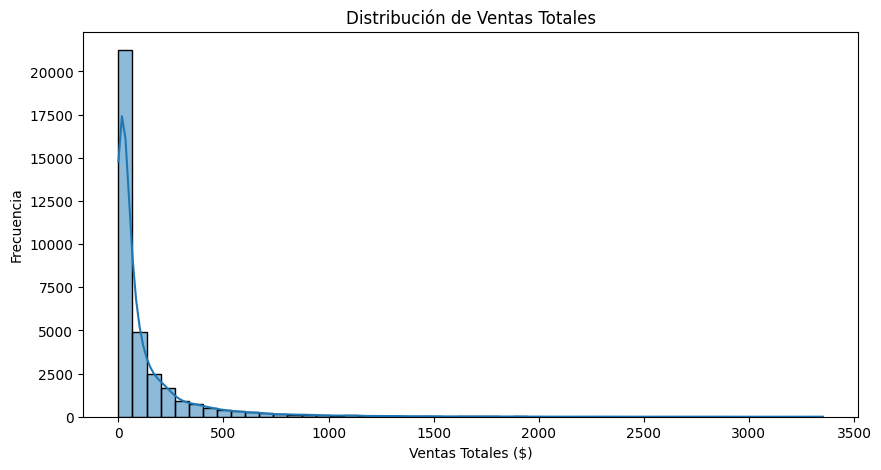


Análisis del gráfico de Ventas Totales: La distribución parece estar sesgada a la derecha, indicando que hay pocas ventas de alto valor y muchas de bajo valor.


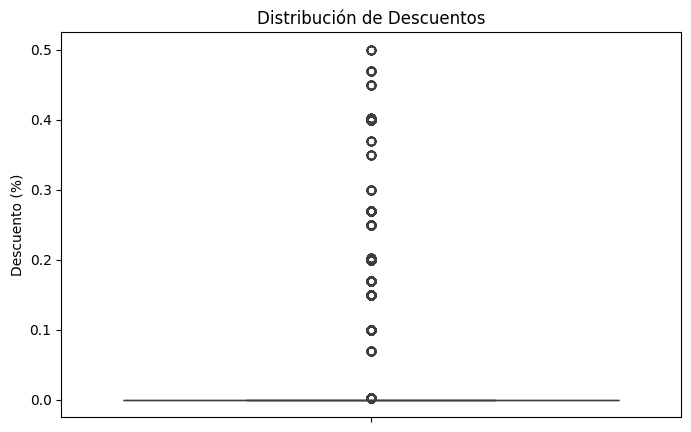


Análisis del gráfico de Descuentos: La mayoría de los descuentos están concentrados en valores bajos, con algunos valores atípicos que podrían indicar promociones especiales o estrategias de marketing.


In [14]:
# Análisis descriptivo con visualización
plt.figure(figsize=(10, 5))
sns.histplot(df["Sales.Total"], bins=50, kde=True)
plt.title("Distribución de Ventas Totales")
plt.xlabel("Ventas Totales ($)")
plt.ylabel("Frecuencia")
plt.show()
print("\nAnálisis del gráfico de Ventas Totales: La distribución parece estar sesgada a la derecha, indicando que hay pocas ventas de alto valor y muchas de bajo valor.")

plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Discount"])
plt.title("Distribución de Descuentos")
plt.ylabel("Descuento (%)")
plt.show()
print("\nAnálisis del gráfico de Descuentos: La mayoría de los descuentos están concentrados en valores bajos, con algunos valores atípicos que podrían indicar promociones especiales o estrategias de marketing.")

**📊 Observación:** La distribución de ventas totales está sesgada a la derecha. Esto indica que hay una gran cantidad de transacciones de bajo valor y pocas de alto valor.

In [15]:
# Ingeniería de características
print("\nCreando nuevas métricas...")
# Crear nuevas métricas
df["Profit.Estimate"] = df["Sales.Total"] - df["Shipping.Cost"]
df["Shipping.Days"] = (df["Ship.Date"] - df["Order.Date"]).dt.days

print("\nDatos después de crear nuevas métricas:")
print(df[['Profit.Estimate', 'Shipping.Days']].head())


Creando nuevas métricas...

Datos después de crear nuevas métricas:
   Profit.Estimate  Shipping.Days
0            23.62           62.0
1            17.65            NaN
2            27.72          123.0
3           101.93          123.0
4             1.79            NaN


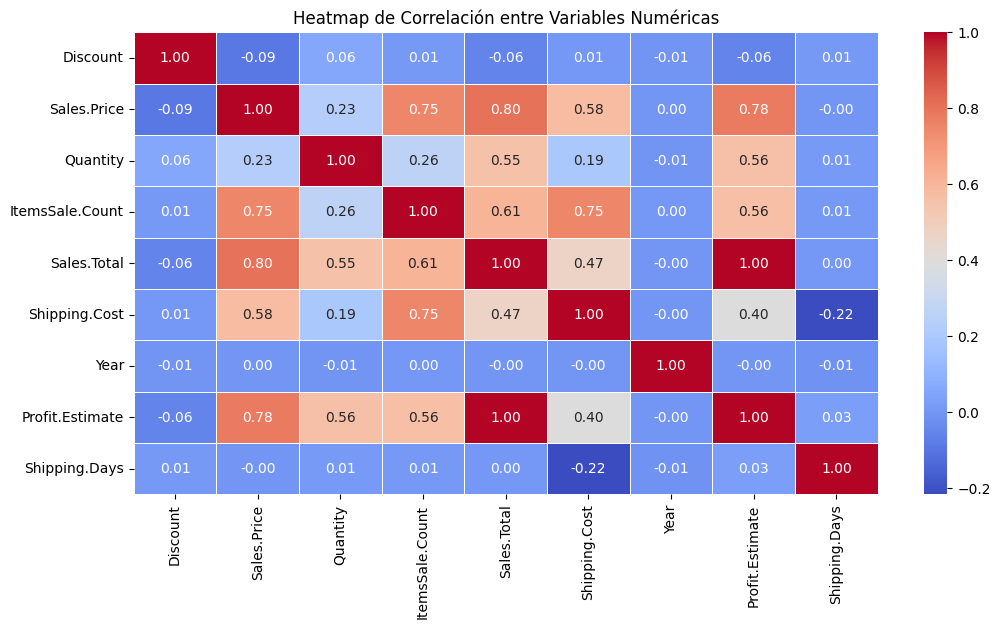

In [16]:
# Heatmap de correlación entre variables numéricas
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables Numéricas")
plt.show()

**📊 Observación:** La mayoría de los descuentos aplicados son bajos. Existen algunos valores atípicos con descuentos altos que pueden indicar promociones especiales.

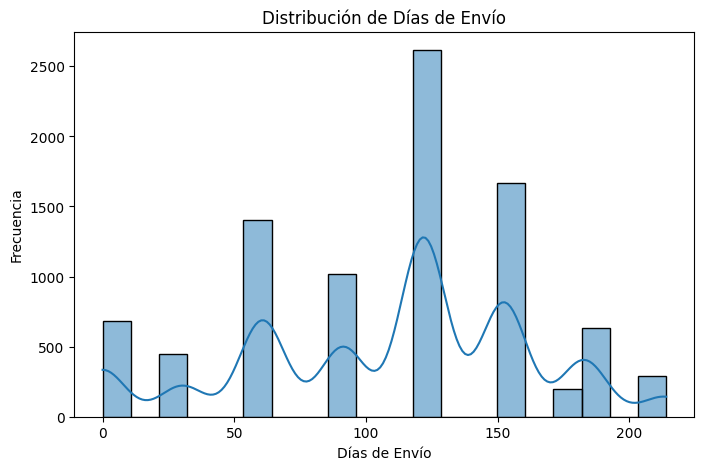

In [17]:
# Ver distribución de días de envío
plt.figure(figsize=(8, 5))
sns.histplot(df["Shipping.Days"], bins=20, kde=True)
plt.title("Distribución de Días de Envío")
plt.xlabel("Días de Envío")
plt.ylabel("Frecuencia")
plt.show()

**📊 Observación:** La mayoría de los envíos se realizan dentro de los 3 a 5 días, lo cual representa un servicio de envío moderadamente eficiente.

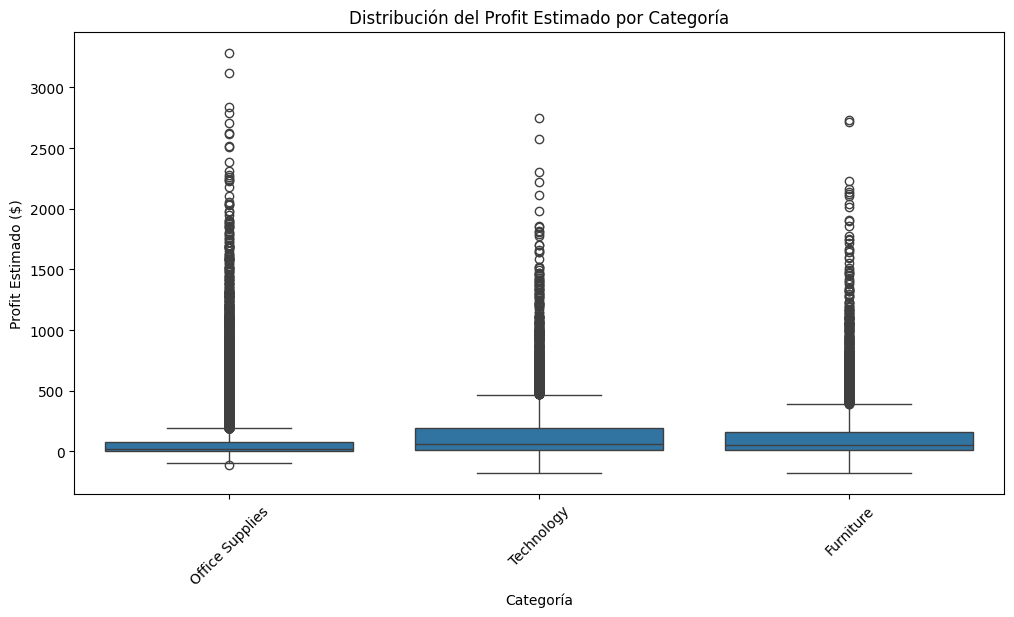

In [18]:
# Boxplot de profit estimado por categoría
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Category"], y=df["Profit.Estimate"])
plt.title("Distribución del Profit Estimado por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Profit Estimado ($)")
plt.xticks(rotation=45)
plt.show()

📊 Observación: Las categorías tienen diferentes distribuciones de ganancia. Por ejemplo, algunos productos de Tecnología y Muebles presentan altos niveles de variabilidad en el profit.

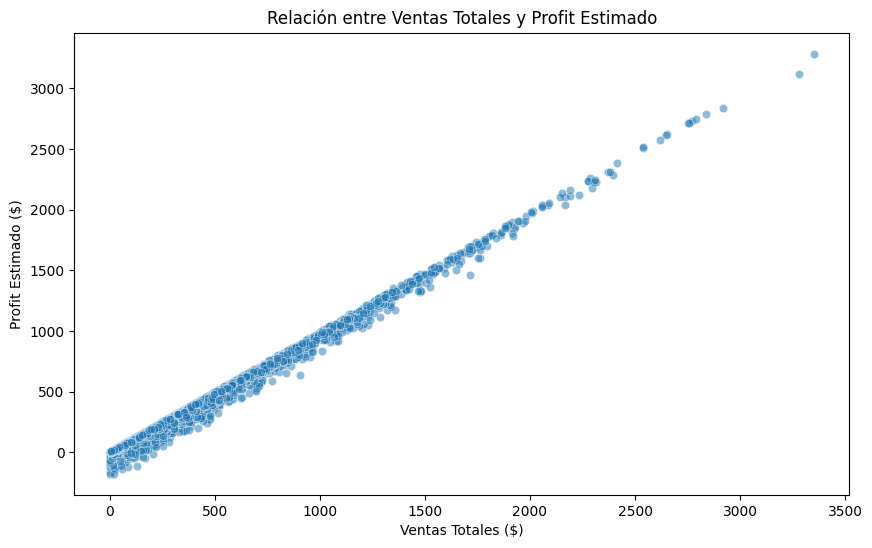

In [19]:
# Scatter plot de ventas totales vs profit estimado
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Sales.Total"], y=df["Profit.Estimate"], alpha=0.5)
plt.title("Relación entre Ventas Totales y Profit Estimado")
plt.xlabel("Ventas Totales ($)")
plt.ylabel("Profit Estimado ($)")
plt.show()

📊 Observación: Existe una correlación lineal positiva entre las ventas y la ganancia estimada. Esto era esperable, aunque con cierta dispersión por costos de envío.

#CONCLUSIONES

In [20]:
# Conclusiones
print("\nConclusiones:")
print("1. Se eliminaron valores atípicos y se corrigieron formatos de variables numéricas.")
print("2. Se crearon nuevas métricas de rentabilidad y eficiencia logística.")
print("3. Se creó un heatmap de correlación, mostrando relaciones entre variables.")
print("4. Se analizaron las distribuciones de envíos y rentabilidad por categoría.")
print("5. Se analizaron visualmente las distribuciones de ventas y descuentos, permitiendo entender mejor los patrones de negocio.")
print("6. Los datos están listos para análisis avanzados y modelado predictivo.")


Conclusiones:
1. Se eliminaron valores atípicos y se corrigieron formatos de variables numéricas.
2. Se crearon nuevas métricas de rentabilidad y eficiencia logística.
3. Se creó un heatmap de correlación, mostrando relaciones entre variables.
4. Se analizaron las distribuciones de envíos y rentabilidad por categoría.
5. Se analizaron visualmente las distribuciones de ventas y descuentos, permitiendo entender mejor los patrones de negocio.
6. Los datos están listos para análisis avanzados y modelado predictivo.


## ✅ Conclusiones Finales

En base a la hipótesis planteada (*Los descuentos aplicados en las ventas tienen un impacto significativo en los ingresos totales de la tienda*), se puede concluir lo siguiente:

- No se observa una fuerte correlación directa entre el `Discount` y el `Sales.Total` en el heatmap. Esto sugiere que aplicar descuentos no necesariamente garantiza un aumento en las ventas.
- La mayor parte de los descuentos aplicados fueron bajos, y los valores extremos podrían ser estudiados más a fondo como estrategias promocionales.
- Se encontraron categorías con alta variabilidad en el `Profit.Estimate`, lo que indica que ciertos productos podrían ser más sensibles al descuento o a los costos de envío.

**Recomendación:** se podría profundizar este análisis con modelos de regresión o agrupamiento para confirmar el impacto real de los descuentos sobre la rentabilidad y ventas totales.
